In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log as ln
from termcolor import colored

Método que grafica un diagrama de barras

In [119]:
def bar_plot(x,name):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=data[x].value_counts().index, y=data[x].value_counts(), data=data,edgecolor='black')
    ax.set_xlabel(name)
    ax.set_ylabel('frecuencia ni')
    ax.set_title(f'Diagrama de barras {name}')
    plt.show()

Método que grafica una ojiva

In [120]:
def hist_Ogive_plot(x,m,name):
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.hist(data[x], bins=m, edgecolor='black')
    plt.ylabel('Frecuencia Absoluta ni')
    plt.xlabel(name)
    plt.title(f"Histograma de {name}")
    plt.subplot(122)
    plt.hist(data[x], bins=m, edgecolor='black', cumulative=True, histtype='step')
    plt.ylabel('Freacuencia Relativa Acumulada Fi')
    plt.xlabel(name)
    plt.title(f"Diagrama de Ojiva de {name}")
    plt.show()

Determina el número de intervalos que debe tener la tabla de frecuencias

In [121]:
def intervals_class(N):
    m1 = np.sqrt(N)
    m2 = 1+3.3*np.log10(N)
    m3 = ln(N)/ln(2)
    return [m1,m2,m3] 

Método que crea los intervalos que debe tener la tabla de frecuencias

In [122]:
def made_intervals_class(x, m,date,t):
    range_i =  date[x].max() - date[x].min()
    amplitude = range_i/m
    tupla = (range_i,np.rint(amplitude)) 
    if t == 1:
        tupla = (range_i,np.round(amplitude,5))
    return tupla

Método que crea la marca de clase

In [123]:
def class_mark(intervale,c):
    f_value = np.round((intervale[0][1]+intervale[0][0])/2,5)
    m_values = []
    m_values.append(f_value)
    for i in range(len(intervale)-1):
        f_value = np.round(f_value + c,5)
        m_values.append(f_value)
    return m_values

Crea tabla de frecuencia para datos cuantitativos

In [124]:
def made_frequency_table_A(x, date,t,name):
    
    m = int(np.rint(np.array(intervals_class(date[x].shape[0])).min()))
    temp = made_intervals_class(x, m,date,t)
    r = temp[0]
    c = temp[1]
    intervale = []
    n = data[x].min()
    for i in range(m):
        if i < m-1:
            intervale.append((n,np.around(n+c,5)))
            n = np.around(n+c,5)
        else:
            intervale.append((n,np.around(n+c,5)+(data[x].max()-(np.around(n+c,5)))))
    
    alfa = date[x]
    alfa = alfa.sort_values()
    
    ni = []
    for i in range(m):
        if i==0:
            a = alfa[alfa <= intervale[i][1]]
            ni.append(len(a))
        else:
            a = alfa[(alfa > intervale[i][0]) & (alfa<=intervale[i][1])]
            ni.append(len(a))
    dic = {name:intervale,'ni':ni}
    dic = pd.DataFrame(dic)
    total = dic['ni'].sum()
    dic['fi'] = dic['ni']/total
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic['Xí'] = class_mark(intervale,c)
    dic.loc[str(m)] = ['Total',total,' ',' ',' ',' ']
    return dic    

Crea tabla de frecuencia para datos categoricos

In [125]:
def made_frequency_table_B(x,date,m):
    
    intervale = []
    ni = []
    intervale = list(date[x].unique())
    ni = list(date[x].value_counts(dropna = False).values)
    dic = pd.DataFrame()
    total = np.sum(ni)
    dic[m] = intervale
    dic['ni'] = ni
    dic['fi'] = np.round(dic['ni']/total,5)
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic.loc[len(ni)+1] = ['Total',total,' ',' ',' ']
    return dic

# Preparación de los datos
#### Descripción de las caracteristicas ('features')
- ts:     Hora de inicio del flujo
- te:     Hora de finalización del flujo
- td:     Duración del flujo
- sa:     Dirección IP origen
- da:     Dirección IP de destino
- sp:     Puerto de origen
- dp:     Puerto de destino
- pr:     Protocolo
- flg:    Banderas
- fwd:    Estado de reenvío
- stos:   Tipo de servicio de origen
- ipkt:   Paquetes de entrada
- ibyt:   Bytes de entrada
- opkt:   Paquetes de salida
- obyt:   Bytes de salida
- in:     Interfaz de entrada
- out:    Interfaz de salida
- sas:    Número de sistema autónomo BGP de origen
- das:    Número de sistema autónomo BGP de destino
- smk:    Máscara de red de origen
- dmk:    Máscara de red de destino
- dtos:   Tipo de servicio de destino
- dir:    Dirección del flujo
- nh:     Enrutador de siguiente salto
- nhb:    Enrutador de siguiente salto BGP
- svln:   VLAN de origen
- dvln:   VLAN de destino
- ismc:   Dirección MAC de la fuente de entrada   
- odmc:   Dirección MAC de destino de salida
- idmc:   Introduzca la dirección MAC de destino
- osmc:   Dirección MAC de la fuente de salida
- mpls1:  Etiqueta MPLS 1
- mpls2:  Etiqueta MPLS 2
- mpls3:  Etiqueta MPLS 3
- mpls4:  Etiqueta MPLS 4
- mpls5:  Etiqueta MPLS 5
- mpls6:  Etiqueta MPLS 6
- mpls7:  Etiqueta MPLS 7
- mpls8:  Etiqueta MPLS 8
- mpls9:  Etiqueta MPLS 9
- mpls10: Etiqueta MPLS 10
- cl:     Latencia del cliente
- sl:     Latencia del servidor
- al:     Latencia de la aplicación
- ra:     Exportando la dirección IP del sistema (enrutador)
- eng:    Tipo / ID de motor
- exid:   Exportando el ID del sistema
- tr:     Marca de tiempo de flujo recibido
- type:   Tipo de registro Mina/ no Mina 
- cryptocurrency: : Tipo criptomoneda
- id_Cryptocurrency:: Id Criptomoneda

In [126]:
print(colored(f'Cargamos los datos', attrs=['bold']))
data = pd.read_csv('./dataA.csv')
data.head().T

Cargamos los datos


,0,1,2,3,4
index,99020,122925,261357,26581,32874
References,319-csves/1.csv,387-csves/0.csv,764-csves/1.csv,101-csves/1.csv,130-csves/0.csv
ts,2020-09-12 15:29:52,2020-09-12 22:58:30,2020-09-16 22:25:21,2020-09-10 04:01:12,2020-09-10 06:48:02
te,2020-09-12 15:29:52,2020-09-12 22:58:30,2020-09-16 22:25:21,2020-09-10 04:02:44,2020-09-10 06:48:02
td,0,0.58,0,92.252,0
sa,192.168.0.1,192.168.0.12,192.168.0.13,172.217.30.206,104.18.226.52
da,192.168.0.13,239.255.255.250,192.168.0.1,192.168.0.13,192.168.0.13
sp,53,41213,52109,443,443
dp,52947,1900,53,40096,51808
pr,UDP,UDP,UDP,TCP,TCP


# Análisis inicial

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465084 entries, 0 to 465083
Data columns (total 52 columns):
index             465084 non-null int64
References        465084 non-null object
ts                465084 non-null object
te                464976 non-null object
td                464976 non-null float64
sa                464976 non-null object
da                464976 non-null object
sp                464976 non-null float64
dp                464976 non-null float64
pr                464976 non-null object
flg               464976 non-null object
fwd               464976 non-null float64
stos              464976 non-null float64
ipkt              464976 non-null float64
ibyt              464976 non-null float64
opkt              464976 non-null float64
obyt              464976 non-null float64
in                464976 non-null float64
out               464976 non-null float64
sas               464976 non-null float64
das               464976 non-null float64
smk             

In [128]:
print(colored(f'El conjunto de datos consta de {len(data.index)} registros y {len(data.columns)} columnas', attrs=['bold']))

El conjunto de datos consta de 465084 registros y 52 columnas


### Inspección datos faltantes

In [129]:
print(colored(f'Valores faltantes por columnas', attrs=['bold']))
avaliable = data.notnull()
avaliable.apply(pd.Series.value_counts).T

Valores faltantes por columnas


,False,True
index,NaN,465084.0
References,NaN,465084.0
ts,NaN,465084.0
te,108.0,464976.0
td,108.0,464976.0
sa,108.0,464976.0
da,108.0,464976.0
sp,108.0,464976.0
dp,108.0,464976.0
pr,108.0,464976.0


In [130]:
print(colored(f'Valores faltantes en todo el conjunto de datos', attrs=['bold']))
avaliable = avaliable.all(axis=1).value_counts()
avaliable

Valores faltantes en todo el conjunto de datos


True     464976
False       108
dtype: int64

In [131]:
print(colored(f'Eliminamos los datos faltantes, ya que tan solo representan un {(avaliable[0]/avaliable[1])*100}% de los datos. Quedaron {data.shape[0] - avaliable[0]} registros', attrs=['bold']))

Eliminamos los datos faltantes, ya que tan solo representan un 0.02322700526478786% de los datos. Quedaron 464976 registros


In [132]:
data = data.dropna()
print(f'conjunto de datos nuevo, tiene {len(data)} registros')

conjunto de datos nuevo, tiene 464976 registros


### Inspección de tipo de dato incorrecto
Analice que las columnas tuvieran un tipo de dato acorde a su naturaleza. Me concentrare en datos que tengan por lo menos dos valores en los registros, puesto que hay varias categorías con un solo valor.

Las variables: puerto de origen (sp), puerto de destino (dp), paquetes de entrada(ipkt) y número de bytes de entrada (ibyte), son de naturaleza discreta y no continuas. Por el motivo anterior le cambio el tipo de dato a un discreto.

In [136]:
data.astype({'sp':'int64'})
data.astype({'dp':'int64'})
data.astype({'ipkt':'int64'})
data.astype({'ibyt':'int64'})

,index,References,ts,te,td,sa,da,sp,dp,pr,...,mpls10,cl,sl,al,ra,eng,exid,tr,cryptocurrency,type
0,99020,319-csves/1.csv,2020-09-12 15:29:52,2020-09-12 15:29:52,0.000,192.168.0.1,192.168.0.13,53,52947,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
1,122925,387-csves/0.csv,2020-09-12 22:58:30,2020-09-12 22:58:30,0.580,192.168.0.12,239.255.255.250,41213,1900,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
2,261357,764-csves/1.csv,2020-09-16 22:25:21,2020-09-16 22:25:21,0.000,192.168.0.13,192.168.0.1,52109,53,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
3,26581,101-csves/1.csv,2020-09-10 04:01:12,2020-09-10 04:02:44,92.252,172.217.30.206,192.168.0.13,443,40096,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
4,32874,130-csves/0.csv,2020-09-10 06:48:02,2020-09-10 06:48:02,0.000,104.18.226.52,192.168.0.13,443,51808,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
5,431941,1232-csves/1.csv,2020-09-20 23:01:11,2020-09-20 23:01:11,0.000,192.168.0.13,192.168.0.1,46605,53,UDP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
6,238827,689-csves/1.csv,2020-09-16 14:48:57,2020-09-16 14:49:44,46.830,172.217.173.34,192.168.0.13,443,40088,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
7,72416,251-csves/1.csv,2020-09-10 23:18:54,2020-09-10 23:19:51,56.703,150.136.25.38,192.168.0.13,443,52608,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
8,397579,1141-csves/1.csv,2020-09-20 14:16:52,2020-09-20 14:18:24,92.128,192.168.0.13,104.36.115.109,51496,443,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine
9,72286,251-csves/1.csv,2020-09-10 23:18:13,2020-09-10 23:19:45,92.089,192.168.0.13,67.202.110.21,44742,443,TCP,...,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0.0,1969-12-31 19:00:00.000,Does_not_have,not_mine


### Estructuración del conjunto de datos
Agrupo las columnas de tipo discretas(int64), continuas(float64) y categoricas(object) por separado, para hacer una analisis mas organizado

In [139]:
data_numeric_int = (data.dtypes == "int64")
data_numeric_float = (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric_int = [c for c in data_numeric_int.index if data_numeric_int[c]]
data_numeric_float = [c for c in data_numeric_float.index if data_numeric_float[c]]
data_object = [c for c in data_object.index if data_object[c]]

Variables cuantitativas discretas

In [140]:
data_numeric_int

['index', 'sp', 'dp', 'ipkt']

Variables cuantitativas continuas

In [141]:
print(data_numeric_float)

['td', 'fwd', 'stos', 'ibyt', 'opkt', 'obyt', 'in', 'out', 'sas', 'das', 'smk', 'dmk', 'dtos', 'dir', 'svln', 'dvln', 'cl', 'sl', 'al', 'exid']


Variables categoricas

In [142]:
print(data_object)

['References', 'ts', 'te', 'sa', 'da', 'pr', 'flg', 'nh', 'nhb', 'ismc', 'odmc', 'idmc', 'osmc', 'mpls1', 'mpls2', 'mpls3', 'mpls4', 'mpls5', 'mpls6', 'mpls7', 'mpls8', 'mpls9', 'mpls10', 'ra', 'eng', 'tr', 'cryptocurrency', 'type']


### Balance del conjunto de datos
Analizare si la data esta balanceada

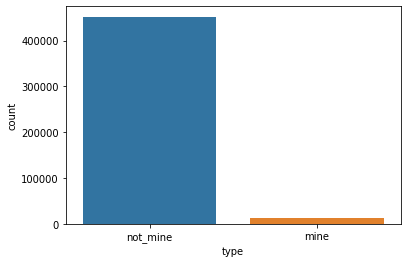

In [144]:
ax = sns.countplot(x='type', data=data)

<font color="Red"><b><h1> Análisis</h1> </font>
El conjunto de datos A como se aprecia no esta balanceada, esto es debido a que en un principio se trato de balancear el conjunto de datos B que tiene trafico minero no identificado, por tal razón el conjunto benigno se le añadio más registros. **Para remediar lo anterior, agrupare de manera pseudoaletoria registros no mineros con la finalidad de balancear el conjunto de datos A**.

# Inspección de datos no agrupados

### Datos categoricos 

No tengo en cuenta a 'references', ya que solo hace referencia a los nombres de los flujos. La moda(top) indica que hay elementos con la misma referencia, dado que concatenamos varios registros de diferentes conjuntos de datos, pero no significa que los registros sean repetidos.

In [143]:
print(colored(f'Variables categoricas', attrs=['bold']))
data[data_object].describe().T

Variables categoricas


,count,unique,top,freq
References,464976,3433,1033-csves/1.csv,3313
ts,464976,79736,2020-09-15 12:51:23,192
te,464976,105209,2020-09-15 12:51:23,192
sa,464976,10226,192.168.0.13,220340
da,464976,10252,192.168.0.13,217974
pr,464976,4,TCP,346633
flg,464976,20,...A....,131167
nh,464976,1,0.0.0.0,464976
nhb,464976,1,0.0.0.0,464976
ismc,464976,1,00:00:00:00:00:00,464976


<font color="Red"><b><h1> Análisis</h1> </font>
- Las Hora de inicio (ts) y la hora final(te) tienen la misma moda, con la misma frecuencia.
- La dirección ip de origen (sa) y la dirección ip de origen (da) tienen la misma moda. Con frecuencias distintas
- La moda en el protocolo es TCP.
- La flag con mas iteraciones es __A__.
- Tanto el enrutador de salto y de salto BGP tienen la misma intrfaz para todos sus registros.
- La dirección Mac (idmc) de entrada y la dirección mac(odmc) no fueron registradas por la herramienta

### Datos continuos

In [ ]:
print(colored(f'Variables continuas', attrs=['bold']))
data[data_numeric_float].describe().T

# Análisis datos Agrupados

### Datos categoricos

- No tengo en cuenta a las variables 'nh', 'nhb', 'ismc', 'odmc', 'idmc', 'osmc', 'mpls1', 'mpls2', 'mpls3', 'mpls4', 'mpls5', 'mpls6', 'mpls7', 'mpls8', 'mpls9', 'mpls10', 'ra', 'eng' y 'tr' en esta etapa del análisis, puesto que solamente hay un valor y es el mismo para todos los registros.

In [ ]:
data_object_list = ['pr','flg', 'cryptocurrency', 'type']
tables_frequency_cualitative = []
namess = ['Protocolo','Banderas','Criptomonedas','Tipo']
for j, i in enumerate(data_object_list):
    tables_frequency_cualitative.append(made_frequency_table_B(i, data,namess[j]))

In [ ]:
print(colored(f'Tabla de frecuencia {namess[0]}',attrs=['bold']))
print(tables_frequency_cualitative[0])
bar_plot(data_object_list[0],namess[0])
v = data[data_object_list[0]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

In [ ]:
print(colored(f'Tabla de frecuencia {namess[1]}',attrs=['bold']))
print(tables_frequency_cualitative[1])
bar_plot(data_object_list[1],namess[1])
v = data[data_object_list[1]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

In [ ]:
print(colored(f'Tabla de frecuencia {namess[2]}',attrs=['bold']))
print(tables_frequency_cualitative[2])
bar_plot(data_object_list[2],namess[2])
v = data[data_object_list[2]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

In [ ]:
print(colored(f'Tabla de frecuencia {namess[3]}',attrs=['bold']))
print(tables_frequency_cualitative[3])
bar_plot(data_object_list[3],namess[3])
v = data[data_object_list[3]].value_counts()
print(v)
print(colored(f'El protocolo con mas observaciones en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

### Datos continuos

Las variables 'fwd', 'stos', 'opkt', 'obyt', 'in', 'out', 'sas', 'das', 'smk', 'dmk', 'dtos', 'dir', 'svln', 'dvln', 'cl', 'sl','al' y 'exid' son descartadas para esta etapa del analisis exploratorio, puesto que su valor es 0 en sus registros.

In [ ]:
data_numeric_float_list = ['td','ipkt','ibyt']
name = ['Duración del flujo','Número Paquetes de entrada','Byte de entradas']
tables_frequency = []
for j, i in enumerate(data_numeric_float_list):
    tables_frequency.append(made_frequency_table_A(i, data,1, name[j]))

In [ ]:
m = intervals_class(data.shape[0])
m = int(np.rint(np.min(m)))
m

In [ ]:
print(colored('Tabla de frecuencia de {name[0]}',attrs=['bold']))
print(tables_frequency[0])
hist_Ogive_plot(data_numeric_float_list[0],m,name[0])

In [ ]:
print(colored('Tabla de frecuencia de {name[1]}',attrs=['bold']))
print(tables_frequency[1])
hist_Ogive_plot(data_numeric_float_list[1],m,name[1])

In [ ]:
print(colored('Tabla de frecuencia de {name[2]}',attrs=['bold']))
print(tables_frequency[2])
hist_Ogive_plot(data_numeric_float_list[2],m,name[2])

### Datos discretos

In [ ]:
data_numeric_int_list = ['sp','dp']        
tables_frequency_int = []
name = ['Puerto origen', 'Puerto destino']
for j,i in enumerate(data_numeric_int_list):
    tables_frequency_int.append(made_frequency_table_A(i, data,1,name[j]))

In [ ]:
name[0]

In [ ]:
print(colored('Tabla de frecuencia de Puerto origen',attrs=['bold']))
print(tables_frequency_int[0])
hist_Ogive_plot(data_numeric_int_list[0],m,name[0])

In [ ]:
print(colored('Tabla de frecuencia de Puerto destino',attrs=['bold']))
print(tables_frequency_int[1])
hist_Ogive_plot(data_numeric_int_list[1],m,name[1])